## Holographic Reconstruction

In [2]:
import numpy as np
import os
from skimage.restoration import unwrap_phase
from Utils.DataManager import import_image, import_image_seq, export_image
from Utils.Modifiers import ImageToArray, PreprocessHologram
from Utils.Processing_Np import AngularSpectrumSolver as AsSolver, MultiHeightPhaseRecovery as MHPR
import tensorflow as tf
import matplotlib
from matplotlib import pyplot as plt

### Back Propagation
Forward reconstruction of inline holograms using angular spectrum method.
#### Import Images
- Specify paths to the background (if exists) and hologram images.
- Images are needed to be standardized using ProcessHologram

In [5]:
bg_path = "PATH_TO_IMAGE.tif"
h_path = "PATH_TO_IMAGE.tif"
p1 = ImageToArray(bit_depth=16, channel='gray', crop_window=None, dtype='float32')
#bg = import_image(bg_path, preprocessor=p1)
bg = np.ones((512, 512))  # if no background
p2 = PreprocessHologram(background=bg)
h = import_image(h_path, preprocessor=[p1, p2])

z = -300

Image imported from: D:/Research data/results/images/selected/Simulation/test 1/MHPR/Holograms/1_350.tif


#### Solve
- Initialize angular spectrum solver.
- Call solver.reconstruct() and pass the complex-valued hologram and its z distance as parameters.

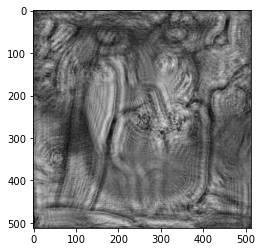

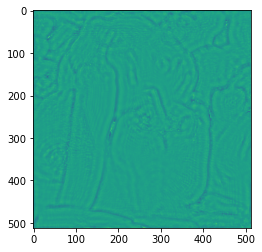

In [6]:
obj = h + 0j
solver = AsSolver(shape=obj.shape, dx=1.12, dy=1.12, wavelength=532e-3)

res_amp = np.abs(solver.reconstruct(obj, z))
res_phase = unwrap_phase(np.angle(solver.reconstruct(obj, z)))

plt.imshow(res_amp, cmap='gray')
plt.show()
plt.imshow(res_phase, cmap='viridis')
plt.show()


#### Solve on CPU (numpy)
- Specify paths to the background (if exists) and hologram images.
- Initialize angular spectrum solver.
- Feed solver.reconstruct() with the hologram (complex-valued) and sample-to-sensor distance ,z.

In [8]:
bg_path = "PATH_TO_IMAGE.tif"
h_path = "PATH_TO_IMAGE.tif"
p1 = ImageToArray(bit_depth=16, channel='gray', crop_window=None, dtype='float32')
#bg = import_image(bg_path, preprocessor=pp1)
bg = np.ones((512, 512))  # if no background
p2 = PreprocessHologram(background=bg)
h = import_image(h_path, preprocessor=[p1, p2])

obj = h + 0j
solver = AsSolver(shape=obj.shape, dx=1.12, dy=1.12, wavelength=532e-3)

z = -300
res_amp = np.abs(solver.reconstruct(obj, z))
res_phase = unwrap_phase(np.angle(solver.reconstruct(obj, z)))

plt.imshow(res_amp, cmap='gray')
plt.show()
plt.imshow(res_phase, cmap='viridis')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\OneDrive\\Python\\Holographic_Reconstruction\\PATH_TO_IMAGE.tif'

### Multi-Height-Phase-Recovery (MHPR)
Iterative phase retrieval procedure for inline holograms using a sequence of axially displaced hologram images.
#### Import images
- Specify paths to background image (if exists) and hologram sequence and assign their heights in the <b><i>z_values</i></b> array.

In [9]:
bg_path = "PATH_TO_IMAGE.tif"

img_seq_paths = [
	"PATH_TO_IMAGE_0.tif",
	"PATH_TO_IMAGE_1.tif",
	"PATH_TO_IMAGE_2.tif",
	"PATH_TO_IMAGE_3.tif",
	"PATH_TO_IMAGE_4.tif",
	"PATH_TO_IMAGE_5.tif",
	"PATH_TO_IMAGE_6.tif",
	"PATH_TO_IMAGE_7.tif"
]

p1 = ImageToArray(bit_depth=16, channel='gray', crop_window=None, dtype='float32')
#bg = import_image(bg_path, preprocessor=p1)
bg = np.ones((512, 512))  # if no background
p2 = PreprocessHologram(background=bg)
h_seq = import_image_seq(img_seq_paths, preprocessor=[p1, p2])

z_values = [300, 350, 400, 450, 500, 550, 600, 650]
iterations = 100

Image imported from: D:/Research data/results/images/selected/Simulation/test 1/MHPR/Holograms/0_300.tif
Image imported from: D:/Research data/results/images/selected/Simulation/test 1/MHPR/Holograms/1_350.tif
Image imported from: D:/Research data/results/images/selected/Simulation/test 1/MHPR/Holograms/2_400.tif
Image imported from: D:/Research data/results/images/selected/Simulation/test 1/MHPR/Holograms/3_450.tif
Image imported from: D:/Research data/results/images/selected/Simulation/test 1/MHPR/Holograms/4_500.tif
Image imported from: D:/Research data/results/images/selected/Simulation/test 1/MHPR/Holograms/5_550.tif
Image imported from: D:/Research data/results/images/selected/Simulation/test 1/MHPR/Holograms/6_600.tif
Image imported from: D:/Research data/results/images/selected/Simulation/test 1/MHPR/Holograms/7_650.tif


#### Solve
- Initialize angular spectrum solver.
- Initialize MHPR and pass the solver as parameter. 
- Call mhpr.resolve() and pass hologram sequence, z_values and number of iterations to the as input parameters.

step: 0
step: 5
step: 10
step: 15
step: 20
step: 25
step: 30
step: 35
step: 40
step: 45
step: 50
step: 55
step: 60
step: 65
step: 70
step: 75
step: 80
step: 85
step: 90
step: 95


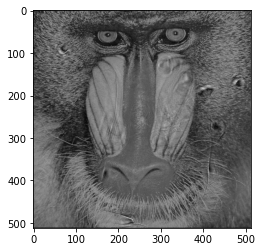

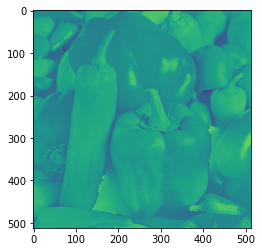

In [10]:
solver = AsSolver(shape=h_seq[0].shape, dx=1.12, dy=1.12, wavelength=532e-3)

mhpr = MHPR(solver)
recovered_h = mhpr.resolve(h_seq, z_values, iterations)
amp = np.abs(recovered_h)
phase = unwrap_phase(np.angle(recovered_h))
phase += np.pi
phase /= 2 * np.pi

plt.imshow(amp, cmap='gray')
plt.show()
plt.imshow(phase, cmap='viridis')
plt.show()


#### Export Results

In [ ]:
cmap = matplotlib.cm.get_cmap('viridis')

export_image(amp, os.path.join('PATH', 'AMP.png'), dtype='uint8')
export_image(phase, os.path.join('PATH', 'PH.png'), dtype='uint8')
export_image(cmap(phase), os.path.join('PATH', 'PH_CM.png'), dtype='uint8')
